In [2]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [3]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('../../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16])
    out= pd.read_csv('../../../data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19])
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# Min Max Scaler

In [5]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Model

In [6]:
model1 = Sequential()
model1.add(keras.Input(shape=(1,5)))
model1.add(tf.keras.layers.LSTM(7,activation="tanh",use_bias=True,kernel_initializer="glorot_uniform",bias_initializer="zeros"))
model1.add(Dense(7))
model1.add(keras.layers.BatchNormalization(axis=-1,momentum=0.99,epsilon=0.001,center=True,scale=True,
                                beta_initializer="zeros",gamma_initializer="ones",
                                moving_mean_initializer="zeros",moving_variance_initializer="ones",trainable=True))
model1.add(keras.layers.ReLU())
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='binary_crossentropy',metrics=['accuracy','mse','mae',rmse])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7)                 364       
                                                                 
 dense (Dense)               (None, 7)                 56        
                                                                 
 batch_normalization (BatchN  (None, 7)                28        
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 7)                 0         
                                                                 
Total params: 448
Trainable params: 434
Non-trainable params: 14
_________________________________________________________________


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

In [8]:
model_fit8 = model1.fit(x_train,y_train,batch_size=256,epochs=50, validation_split=0.1)

Epoch 1/50
4563/4563 [==============================] - 71s 14ms/step - loss: 6.4976e-05 - accuracy: 0.0249 - mse: 1.9861e-06 - mae: 2.0661e-04 - rmse: 3.4317e-04 - val_loss: 4.6618e-06 - val_accuracy: 0.0011 - val_mse: 2.4128e-07 - val_mae: 1.4958e-04 - val_rmse: 2.4933e-04
Epoch 2/50
4563/4563 [==============================] - 60s 13ms/step - loss: 5.9098e-06 - accuracy: 8.1418e-04 - mse: 1.6936e-06 - mae: 1.5117e-04 - rmse: 2.5108e-04 - val_loss: 4.1250e-06 - val_accuracy: 6.2351e-04 - val_mse: 2.3920e-07 - val_mae: 1.4909e-04 - val_rmse: 2.4859e-04
Epoch 3/50
4563/4563 [==============================] - 60s 13ms/step - loss: 3.1178e-06 - accuracy: 5.4000e-04 - mse: 1.6605e-06 - mae: 1.5089e-04 - rmse: 2.5068e-04 - val_loss: 4.0791e-06 - val_accuracy: 5.6652e-04 - val_mse: 2.3835e-07 - val_mae: 1.4905e-04 - val_rmse: 2.4853e-04
Epoch 4/50
4563/4563 [==============================] - 60s 13ms/step - loss: 2.9055e-06 - accuracy: 5.1471e-04 - mse: 1.6447e-06 - mae: 1.5086e-04 - rmse: 

4563/4563 [==============================] - 365s 80ms/step - loss: 1.4369e-06 - accuracy: 5.1425e-04 - mse: 1.1947e-06 - mae: 1.5022e-04 - rmse: 2.4994e-04 - val_loss: 3.9207e-06 - val_accuracy: 5.6474e-04 - val_mse: 2.2943e-07 - val_mae: 1.4889e-04 - val_rmse: 2.4836e-04
Epoch 30/50
4563/4563 [==============================] - 387s 85ms/step - loss: 1.4024e-06 - accuracy: 5.1432e-04 - mse: 1.1797e-06 - mae: 1.5019e-04 - rmse: 2.4991e-04 - val_loss: 3.9193e-06 - val_accuracy: 5.6474e-04 - val_mse: 2.2929e-07 - val_mae: 1.4889e-04 - val_rmse: 2.4835e-04
Epoch 31/50
4563/4563 [==============================] - 337s 74ms/step - loss: 1.3753e-06 - accuracy: 5.1421e-04 - mse: 1.1681e-06 - mae: 1.5017e-04 - rmse: 2.4989e-04 - val_loss: 3.9180e-06 - val_accuracy: 5.6474e-04 - val_mse: 2.2918e-07 - val_mae: 1.4889e-04 - val_rmse: 2.4835e-04
Epoch 32/50
4563/4563 [==============================] - 350s 77ms/step - loss: 1.3384e-06 - accuracy: 5.1409e-04 - mse: 1.1472e-06 - mae: 1.5015e-04 - rm

In [9]:
model1.evaluate(x_test,y_test)

13518/13518 [==============================] - 334s 25ms/step - loss: 2.7844e-05 - accuracy: 5.8163e-04 - mse: 9.4183e-06 - mae: 1.5279e-04 - rmse: 2.5414e-04


[2.784429852908943e-05,
 0.0005816298653371632,
 9.41833513934398e-06,
 0.00015279387298505753,
 0.00025414032279513776]

In [10]:
model1.evaluate(x_train,y_train)

40554/40554 [==============================] - 374s 9ms/step - loss: -2.1106e-07 - accuracy: 5.1870e-04 - mse: 8.9459e-07 - mae: 1.4971e-04 - rmse: 2.4935e-043s


[-2.1105630310103152e-07,
 0.0005187049973756075,
 8.945926879277977e-07,
 0.0001497145858593285,
 0.0002493485517334193]

In [11]:
df1=pd.DataFrame(model_fit8.history['loss'],columns=["Loss"])
df1=df1.join(pd.DataFrame(model_fit8.history["val_loss"],columns=["Val Loss"]))
df1=df1.join(pd.DataFrame(model_fit8.history["accuracy"],columns=['Accuracy']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_accuracy"],columns=['Val Accuracy']))
df1=df1.join(pd.DataFrame(model_fit8.history["mse"],columns=['MSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mse"],columns=['Val MSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["mae"],columns=['MAE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mae"],columns=['Val MAE']))
df1=df1.join(pd.DataFrame(model_fit8.history["rmse"],columns=['RMSE']))
df1=df1.join(pd.DataFrame(model_fit8.history["val_mse"],columns=['Val RMSE']))
df1

,Loss,Val Loss,Accuracy,Val Accuracy,MSE,Val MSE,MAE,Val MAE,RMSE,Val RMSE
0,6.497619e-05,0.000005,0.024947,0.001102,1.986072e-06,2.412800e-07,0.000207,0.000150,0.000343,2.412800e-07
1,5.909827e-06,0.000004,0.000814,0.000624,1.693644e-06,2.392021e-07,0.000151,0.000149,0.000251,2.392021e-07
2,3.117779e-06,0.000004,0.000540,0.000567,1.660450e-06,2.383537e-07,0.000151,0.000149,0.000251,2.383537e-07
3,2.905454e-06,0.000004,0.000515,0.000567,1.644699e-06,2.378104e-07,0.000151,0.000149,0.000251,2.378104e-07
4,2.789558e-06,0.000004,0.000515,0.000567,1.631435e-06,2.371262e-07,0.000151,0.000149,0.000251,2.371262e-07
5,2.696832e-06,0.000004,0.000514,0.000567,1.618335e-06,2.365346e-07,0.000151,0.000149,0.000251,2.365346e-07
6,2.569359e-06,0.000004,0.000514,0.000567,1.594570e-06,2.357434e-07,0.000151,0.000149,0.000251,2.357434e-07
7,2.504228e-06,0.000004,0.000514,0.000567,1.579321e-06,2.352909e-07,0.000151,0.000149,0.000251,2.352909e-07
8,2.434955e-06,0.000004,0.000514,0.000567,1.560418e-06,2.347622e-07,0.000151,0.000149,0.000251,2.347622e-07
9,2.347797e-06,0.000004,0.000515,0.000565,1.535662e-06,2.342028e-07,0.000151,0.000149,0.000250,2.342028e-07


In [12]:
df1.to_excel("LSTM.xlsx")

# Saving Model as File

In [13]:
print(x_test.shape)

(432571, 1, 5)


In [14]:
model_json = model1.to_json()
with open("lstm_tanh.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("lstm_tanh.h5")
print("Saved model to disk")

Saved model to disk


In [15]:
from keras.models import model_from_json
json_file = open('lstm_tanh.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("lstm_tanh.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy',metrics=['accuracy','mse','mae',rmse])

Loaded model from disk


In [16]:
print(loaded_model.history)

None


# Error Analysis

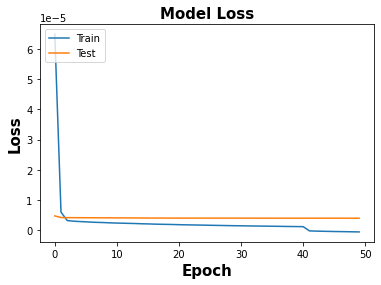

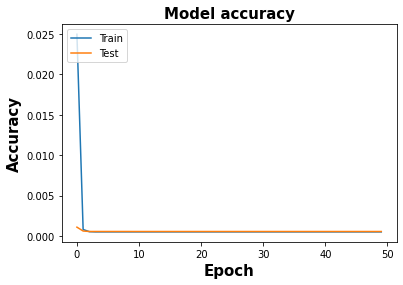

In [17]:
# summarize history for loss
plt.plot(model_fit8.history['loss'])
plt.plot(model_fit8.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(model_fit8.history['accuracy'])
plt.plot(model_fit8.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
#Creating csv file of prediction

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

y_test_pred=loaded_model.predict(x_test)
y_test_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
y_test

array([[[ 9.79468299e-06, -3.84930271e-06, -1.76512026e-04, ...,
          2.43746447e-05,  1.49479260e-05, -1.47755915e-05]],

       [[ 2.84612788e-05, -2.76683863e-06, -3.13935679e-05, ...,
         -2.24112560e-05,  1.28956646e-04, -2.16123625e-04]],

       [[ 5.90693235e-06,  1.06228068e-05,  7.07802471e-04, ...,
         -5.68755312e-05,  2.29819471e-05, -9.74096639e-05]],

       ...,

       [[ 8.93716340e-06,  1.15098622e-05,  2.90576446e-04, ...,
         -5.71358885e-05,  2.98318986e-05, -5.32766896e-05]],

       [[ 3.78002640e-05, -9.21403498e-07, -2.03418677e-04, ...,
         -1.07846927e-05,  1.28738477e-04, -1.92730524e-04]],

       [[-2.99457120e-06, -3.35305481e-06, -2.03672339e-04, ...,
          1.87197272e-05,  3.95544487e-06, -6.36784985e-06]]])

In [21]:
y_test=y_test[:,0]

In [22]:
from numpy import savetxt
savetxt('lstm_y_test_pred.csv', y_test_pred[:1001], delimiter=',')

In [23]:
from numpy import savetxt
savetxt('lstm_y_test.csv', y_test[:1001], delimiter=',')

In [ ]:
#completed